<a href="https://colab.research.google.com/github/JosePaen/analisis-consumo-energetico/blob/main/analisis-consumo-energetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos - Análisis de Consumo Eléctrico en Edificios

## ETL (Extract, Transformation, Load)

### 1. Extract (Extracción)

In [1]:
from google.colab import drive
import pandas as pd


# Montar Google Drive para acceder al archivo
drive.mount('/content/drive', force_remount=True)

ruta_archivo =  '/content/drive/MyDrive/proyecto_data/Dataset.csv'

try:
  df = pd.read_csv(ruta_archivo)
  print('Extracción de datos exitosa')
except:
  print(f'El archivo no se encuentra en la ruta: {ruta_archivo}')

Mounted at /content/drive
Extracción de datos exitosa


### 2. Transformation (Transformación)

In [ ]:
# Muestra las primeras 5 filas del Dataframe
df.head()

In [ ]:
# Muestra un resúmen de la información del Dataframe
df.info()

In [2]:
# Voy a renombrar las columnas para facilitar la interpretación
df.rename(columns = {
          'building_id': 'id_edificio',
          'meter': 'tipo_lectura',
          'site_id': 'id_sitio',
          'primary_use': 'uso_principal',
          'square_feet': 'superficie_ft2',
          'year_built': 'año_construccion',
          'floor_count': 'cantidad_pisos',
          'air_temperature': 'temperatura_aire',
          'cloud_coverage': 'nubosidad',
          'dew_temperature': 'temperatura_rocio',
          'precip_depth_1_hr': 'precipitacion_1hr',
          'sea_level_pressure': 'presion_nivel_mar',
          'wind_direction': 'direccion_viento',
          'wind_speed': 'velocidad_viento',
          'unixtimestamp': 'fecha_hora',
          'm0': 'lectura_m0',
          'm1': 'lectura_m1',
          'm2': 'lectura_m2',
          'm3': 'lectura_m3'


}, inplace=True)


In [3]:
# df.info() no muestra valores nulos, pero el tipo de dataset y
# el tamaño hace sospechar que tiene que haber nulos.
df.isnull().sum()

,0
id_edificio,0
tipo_lectura,0
id_sitio,0
uso_principal,0
superficie_ft2,0
año_construccion,12127645
cantidad_pisos,16709167
temperatura_aire,96658
nubosidad,8825365
temperatura_rocio,100140


In [ ]:
# Imputación de valores nulos

# superficie_ft2 — numérica, distribuciones grandes y amplias
# Se imputa con la MEDIANA para evitar que valores extremos distorsionen la media.
df['superficie_ft2'].fillna(df['superficie_ft2'].median(), inplace=True)

# año_construccion — más del 50% nulo → no aporta mucho al análisis
# Se elimina la columna
df.drop(columns=['año_construccion'], inplace=True)

# cantidad_pisos — igual que año_construcción, demasiados nulos
df.drop(columns=['cantidad_pisos'], inplace=True)

# temperatura_aire — variable continua
# Se imputa con la MEDIA porque el clima suele distribuirse de forma normal
df['temperatura_aire'].fillna(df['temperatura_aire'].mean(), inplace=True)

# nubosidad — categórica con pocos valores únicos
# Se imputa con la MODA (el valor más frecuente en el clima del lugar)
df['nubosidad'].fillna(df['nubosidad'].mode()[0], inplace=True)

# temperatura_rocio — numérica continua
# Se imputa con la MEDIA por tener distribución estable
df['temperatura_rocio'].fillna(df['temperatura_rocio'].mean(), inplace=True)

# precipitacion_1hr — tiene muchos ceros, distribución con outliers
# Se imputa con la MEDIANA porque evita que lluvias extremas distorsionen
df['precipitacion_1hr'].fillna(df['precipitacion_1hr'].median(), inplace=True)

# presion_nivel_mar — variable meteorológica continua
# Se imputa con la MEDIA por ser estable y normalizada
df['presion_nivel_mar'].fillna(df['presion_nivel_mar'].mean(), inplace=True)

# direccion_viento — valores circulares (0-360), distribución discreta
# Se imputa con la MODA (dirección más común)
df['direccion_viento'].fillna(df['direccion_viento'].mode()[0], inplace=True)

# velocidad_viento — variable continua
# Se imputa con la MEDIA porque es estable en registros meteorológicos grandes
df['velocidad_viento'].fillna(df['velocidad_viento'].mean(), inplace=True)


In [5]:
# Convertir fecha_hora a datatime, en el dataset están en formato timestamp
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], unit='s')

print(df['fecha_hora'])

# Crear columnas: mes, hora, día de semana
df['mes'] = df['fecha_hora'].dt.month
df['hora'] = df['fecha_hora'].dt.hour
df['dia_semana'] = df['fecha_hora'].dt.day_name()

#Calcular consumo por metro cuadrado
df['consumo_por_m20'] = df['lectura_m0'] / df['superficie_ft2']
df['consumo_por_m21'] = df['lectura_m1'] / df['superficie_ft2']
df['consumo_por_m22'] = df['lectura_m2'] / df['superficie_ft2']
df['consumo_por_m23'] = df['lectura_m3'] / df['superficie_ft2']

# Correlación = indicador matemático que explica cuánto se relacionan dos variables.
# En mi análisis, me ayuda a descubrir cuáles factores explican mejor el consumo energético.
corr_m0 = df.corr(numeric_only=True)['lectura_m0'].sort_values(ascending=False)
corr_m1 = df.corr(numeric_only=True)['lectura_m1'].sort_values(ascending=False)
corr_m2 = df.corr(numeric_only=True)['lectura_m2'].sort_values(ascending=False)
corr_m3 = df.corr(numeric_only=True)['lectura_m3'].sort_values(ascending=False)

print("Correlación con electricidad (m0):")
print(corr_m0.head(10))

print("Correlación con agua fría (m1):")
print(corr_m1.head(10))

print("Correlación con vapor (m2):")
print(corr_m2.head(10))

print("Correlación con agua caliente (m3):")
print(corr_m3.head(10))


0          2016-01-01 00:00:00
1          2016-01-01 00:00:00
2          2016-01-01 00:00:00
3          2016-01-01 00:00:00
4          2016-01-01 00:00:00
                   ...        
20216095   2016-12-31 23:00:00
20216096   2016-12-31 23:00:00
20216097   2016-12-31 23:00:00
20216098   2016-12-31 23:00:00
20216099   2016-12-31 23:00:00
Name: fecha_hora, Length: 20216100, dtype: datetime64[ns]
Correlación con electricidad (m0):
lectura_m0           1.000000
consumo_por_m20      0.385178
superficie_ft2       0.346764
mes                  0.020847
temperatura_rocio    0.017621
hora                 0.015119
direccion_viento     0.014606
nubosidad            0.012238
velocidad_viento     0.010020
presion_nivel_mar    0.005808
Name: lectura_m0, dtype: float64
Correlación con agua fría (m1):
lectura_m1           1.000000
consumo_por_m21      0.940553
superficie_ft2       0.025519
temperatura_rocio    0.021210
temperatura_aire     0.019218
tipo_lectura         0.013035
mes                  

### 3. Load (Carga)

In [6]:
# Definir la ruta de salida para guardar el nuevo CSV
ruta_salida = '/content/drive/MyDrive/proyecto_data/Dataset_transformado.csv'

# Guardar el dataframe transformado en un nuevo archivo CSV en Drive
df.to_csv(ruta_salida, index=False, sep=',')

print(f'Archivo CSV guardado en: {ruta_salida}')

Archivo CSV guardado en: /content/drive/MyDrive/proyecto_data/Dataset_transformado.csv


## EDA (Exploratory Data Analysis)

mes
8     198412143
9     194313110
7     193838012
6     183774600
10    179451544
11    178817121
12    177986356
5     162783578
1     153557898
4     148221541
3     142746174
2     141562937
Name: lectura_m0, dtype: int64


<Axes: title={'center': 'Consumo eléctrico por mes'}, xlabel='mes'>

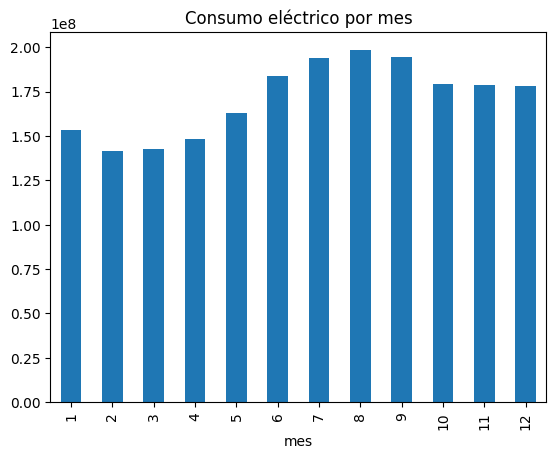

In [7]:
#Pregunta 1
#¿En qué meses se consume más energía?

# Agrupar por mes y sumar consumo eléctrico
consumo_mensual = df.groupby('mes')['lectura_m0'].sum()

print(consumo_mensual.sort_values(ascending=False))

consumo_mensual.plot(kind='bar', title='Consumo eléctrico por mes')

El consumo energético presenta un incremento notable durante los meses de invierno. Los valores más altos se registran entre junio y septiembre, alcanzando su pico en agosto, con un consumo aproximado de 115 kWh.
Esto indica un comportamiento estacional y permite planificar medidas de eficiencia energética durante esa época del año.

                               consumo_por_m20  consumo_por_m21  \
uso_principal                                                     
Utility                               0.006342         0.009788   
Retail                                0.004010         0.000393   
Other                                 0.002576         0.014652   
Manufacturing/industrial              0.002355         0.002018   
Technology/science                    0.001818         0.000420   
Healthcare                            0.001811         0.001731   
Public services                       0.001669         0.000422   
Warehouse/storage                     0.001385         0.000000   
Entertainment/public assembly         0.001310         0.002172   
Parking                               0.001225         0.000005   
Education                             0.001202         0.001181   
Office                                0.001067         0.001036   
Food sales and service                0.000919         0.00265

<Axes: title={'center': 'Consumo eléctrico por m² según uso'}, xlabel='uso_principal'>

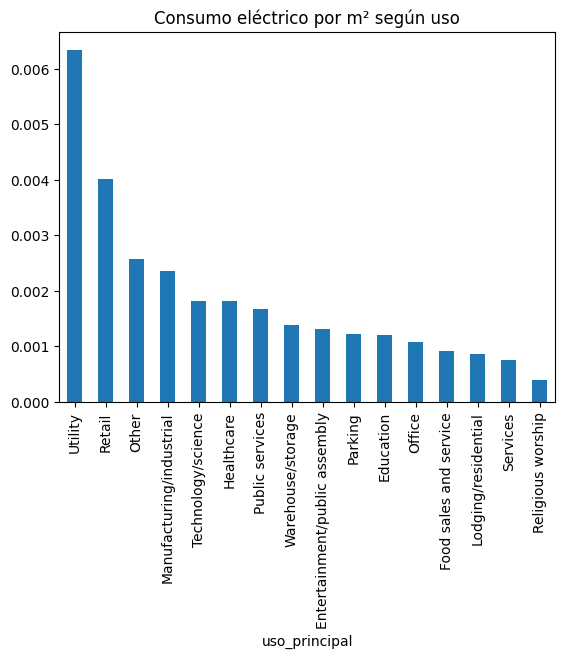

In [8]:
# Pregunta 2
# ¿Qué tipo de edificio consume más energía por m²?

consumo_por_uso = (df.groupby('uso_principal')[['consumo_por_m20','consumo_por_m21','consumo_por_m22','consumo_por_m23']].mean().sort_values(by='consumo_por_m20', ascending=False))

print(consumo_por_uso)

# Gráfico
consumo_por_uso['consumo_por_m20'].plot(kind='bar', title='Consumo eléctrico por m² según uso')



El análisis del consumo energético por metro cuadrado muestra que el sector Utility presenta el mayor nivel de demanda eléctrica relativa al tamaño del edificio. Este tipo de infraestructura suele operar de forma permanente e involucra equipos de alta potencia, lo cual explica su mayor consumo por superficie.

En segundo lugar se ubican los edificios del rubro Retail, donde predominan altas cargas por iluminación y climatización durante largos periodos de tiempo.

Por el contrario, categorías como Residencial, Oficinas y Educación muestran valores menores, lo que indica una mayor eficiencia energética relativa al tamaño del inmueble.

Finalmente, estacionamientos y templos religiosos exhiben consumos casi nulos por m² debido a su funcionamiento esporádico y baja demanda eléctrica.

<Axes: title={'center': 'Correlación entre consumo eléctrico y variables climáticas'}>

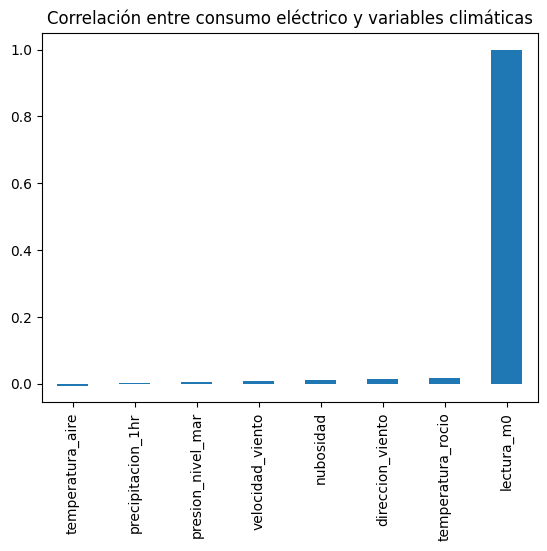

In [9]:
#Pregunta 3
#¿Influye el clima en el consumo eléctrico?

variables_clima = [
    'temperatura_aire',
    'nubosidad',
    'temperatura_rocio',
    'precipitacion_1hr',
    'presion_nivel_mar',
    'direccion_viento',
    'velocidad_viento'
]

# Calcular correlaciones
correlaciones_clima = df[variables_clima + ['lectura_m0']].corr()['lectura_m0'].sort_values()

# Gráfico
correlaciones_clima.plot(kind='bar', title='Correlación entre consumo eléctrico y variables climáticas')




La correlación entre las variables climáticas y el consumo eléctrico (lectura_m0) muestra valores muy cercanos a cero en todos los casos, lo que indica que no existe una relación lineal fuerte entre el clima y el consumo energético de los edificios del dataset.

Esto sugiere que el consumo depende principalmente de características propias de cada edificación (uso, ocupación, equipos, horarios, etc.), por lo cual analizar variables internas del edificio podría resultar más útil para explicar o predecir el consumo.

## Conclusión general del análisis

El análisis del consumo energético mostró tres ideas principales.
Primero, existe una clara estacionalidad: el consumo aumenta durante los meses de invierno y llega a su punto más alto en agosto. Esto sugiere mayor uso de calefacción, iluminación y equipos en esa época del año.

En segundo lugar, al comparar edificios según su uso, los del tipo Utility son los que más energía consumen por metro cuadrado, seguidos por el rubro Retail. Son espacios con mucha actividad y equipos funcionando de forma permanente, por eso su demanda es más alta. En cambio, viviendas, oficinas y escuelas consumen menos en relación con su tamaño, lo que indica un uso más eficiente.

Por último, se vio que las variables climáticas no tienen una relación fuerte con el consumo eléctrico. Esto quiere decir que la energía se usa principalmente por características internas de los edificios —como ocupación, equipamiento o actividad— y no por el clima del momento.

En resumen, el consumo energético depende más del tipo de edificio y la época del año que de las condiciones climáticas. Esta información puede servir para tomar decisiones de eficiencia, anticipar mayor demanda en invierno y enfocar mejoras en los edificios con mayor consumo por superficie.